## Исследование рынка видеоигр

### 1. Изучение исходных данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
import scipy.stats as st

Прочитаем файл и сохраним его в переменной *games*.

In [2]:
games = pd.read_csv('/datasets/games.csv')

Просмотрим таблицу и общую информацию о ней.

In [3]:
display(games)
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод
Таблица содержит 16715 строк и 11 столбцов. Используемые типы данных: *float64* (6), *object* (5). Можно заметить, что не во всех случаях используется подходящий тип данных: *object* для параметра *User_Score* и *float* для *Year_of_Release*. В названиях столбцов и строковых значениях таблицы используются буквы как нижнего, так и верхнего регистров, что может приводить к появлению дубликатов. Также в шести столбцах присутствуют пропущенные значения. Это могло быть вызвано проблемами с выгрузкой данных, либо отсутствием соответствующей информации в источнике. В дальнейшем часть пропусков можно заполнить на основе имеющихся данных, исходя из того, что многие игры выпускаются на нескольких платформах одновременно и имеют один и тот же жанр, рейтинг *ESRB*, а также схожие оценки критиков и пользователей.

### 2. Подготовка данных

Приведём названия столбцов, а также все строковые значения к нижнему регистру.

In [4]:
# Названия столбцов
games.columns = games.columns.str.lower()
# Строковые значения
for i in ['name', 'platform', 'genre', 'rating']:
    games[i] = games[i].str.lower()
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце с названиями игр присутствуют пропущенные значения. Вероятнее всего, они возникли из-за ошибок при выгрузке данных из источника. Так как этих пропусков мало и их не представляется возможным заполнить, удалим строки, которые их содержат.

In [5]:
games = games.dropna(subset = ['name']).reset_index(drop = True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Удалены 2 строки с пропущенными названиями игр. Также можно заметить, что в этих строках отсутствовали и жанры.

Проверим, есть ли в датафрейме записи, которые содержат в столбце *name* какую-либо дополнительную информацию кроме названия. Вероятнее всего такая информация может быть записана в скобках, поэтому выведем строки, содержащие их.

In [6]:
games[games['name'].str.contains('(', regex = False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8596,.hack//g.u. vol.2//reminisce (jp sales),ps2,2006.0,role-playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN
9248,ape escape academy (jp sales),psp,2004.0,misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
13824,atelier iris 3: grand phantasm (jp sales),ps2,2006.0,role-playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
5978,atelier iris 3: grand phantasm (us sales),ps2,2006.0,role-playing,0.14,0.11,0.00,0.04,NaN,NaN,NaN
12515,attack on titan (koei),xone,2016.0,action,0.02,0.03,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4730,yu-gi-oh! the eternal duelist soul (jp sales),gba,2001.0,misc,0.00,0.00,0.40,0.01,NaN,NaN,NaN
1746,yu-gi-oh! the sacred cards (american and other...,gba,2002.0,role-playing,0.84,0.27,0.00,0.05,NaN,NaN,NaN
6316,yu-gi-oh! the sacred cards (jp weekly sales),gba,2002.0,role-playing,0.00,0.00,0.26,0.01,NaN,NaN,NaN
11641,zoo tycoon (2013),x360,2013.0,simulation,0.02,0.06,0.00,0.01,NaN,NaN,NaN


279 строк действительно содержат дополнительную информацию в названии: регион, студия, год выпуска и т. д. Таким образом, данные по одной и той же игре могут быть разбиты на несколько строк, при этом они будут расцениваться как разные игры, так как значения в столбце *name* не совпадают. Чтобы избежать этого, создадим функцию *name_fix*, которая удалит из названия дополнительную информацию, указанную в скобках.

In [7]:
def name_fix(name):
    for i, x in enumerate(name): # перебор всех символов в строке, где i - индекс символа, x - символ
        if x == "(":
            return name[:i]
    return name

games['name'] = games['name'].apply(name_fix).str.strip()

print('Кол-во строк с дополнительной информацией в названии:', 
      games[games['name'].str.contains('(', regex = False)]['name'].count())

Кол-во строк с дополнительной информацией в названии: 0


Удаление доп. информации из названия должно привести к появлению дубликатов по столбцам *name*, *platform* и *year_of_release*, которые при этом могут содержать разные значения по продажам, оценкам и рейтингу. Следовательно, перед удалением таких дубликатов их данные следует объединить. Однако известно, что часть строк содержат пропуски в столбце *year_of_release*. Проверим, есть ли такие строки среди дубликатов по столбцам *name* и *platform*.

In [8]:
games[(games[['name', 'platform']].duplicated(keep = False)) & (games['year_of_release'].isna())].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4126,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,e10+
5293,dragon ball z: budokai tenkaichi 2,wii,NaN,action,0.15,0.05,0.14,0.01,NaN,NaN,NaN
5335,tomb raider,pc,NaN,action,0.06,0.25,0.00,0.04,86.0,8.5,m
6254,the legend of zelda: the minish cap,gba,NaN,action,0.00,0.00,0.27,0.01,NaN,NaN,NaN
10763,luminous arc 2,ds,NaN,role-playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Исходя из предположения, что данные строки также являются дубликатами и по столбцу *year_of_release*, создадим функцию *fill_duplicates* и заполним пропущенные значения года выпуска.

In [9]:
def fill_duplicates(row):
    name = row['name']
    platform = row['platform']
    # Создадим датафрейм со строками, дублирующими по имени и платформе входную 
    # и содержащими значение года выпуска
    filtered = games[(games['name'] == name) & 
                     (games['platform'] == platform) & 
                     (games['year_of_release'].notna())
                    ].reset_index()
    # Если среди отфильтрованных строк есть одно значение года, возвратим его
    if (len(filtered) == 1) | ((len(filtered) > 1) & (np.std(filtered['year_of_release']) == 0)):
        return filtered.at[0, 'year_of_release']
    # Если среди отфильтрованных строк нет значений года, либо есть несколько разных, возвратим NaN
    if len(filtered) == 0:
        print('Для игры', name, 'на платформе', platform, 'нет известных значений года!')
        return float('NaN')
    if (len(filtered) > 1) & (np.std(filtered['year_of_release']) > 0):
        print('Для игры', name, 'на платформе', platform, 'есть несколько разных значений года!')
        return float('NaN')

mask = (games[['name', 'platform']].duplicated(keep = False)) & (games['year_of_release'].isnull())
games.loc[mask, 'year_of_release'] = games.loc[mask].apply(fill_duplicates, axis = 1)
print('Кол-во пропущенных значений года среди дубликатов:', 
      games[games[['name','platform']].duplicated(keep = False)]['year_of_release'].isna().sum())

Кол-во пропущенных значений года среди дубликатов: 0


Создадим функцию *merger*, с помощью которой для дубликатов по названию, платформе и году выпуска объединим информацию, указанную в столбцах *na_sales*, *eu_sales*, *jp_sales*, *other_sales* (основываясь на максимальном значении, так как в части записей присутствуют неполные данные) и в столбцах *critic_score*, *user_score*, *rating* (основываясь на моде значений).

In [10]:
# Для последующей проверки успешности заполнения выделим дубликаты в отдельный датафрейм
df = games[games[['name', 'platform', 'year_of_release']].duplicated(keep = False)].sort_values(['name', 'platform'])
print('До объединения:')
display(df.head(4))

def merger(row):
    mask = ((games['name'] == row['name']) & 
            (games['platform'] == row['platform']) & 
            (games['year_of_release'] == row['year_of_release']))
    max_values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    mode_values = ['critic_score', 'user_score', 'rating']
    # Объединим информацию по максимальным значениям
    games.loc[row.name, max_values] = games.loc[mask, max_values].max()
    # Объединим информацию по моде (или по случайно выбранному значению моды, если их окажется несколько),
    # либо оставим пропуск без заполнения, если подходящих значений не нашлось
    for i in mode_values:
        try:
            games.loc[row.name, i] = rand.choice(games.loc[mask, i].mode())
        except:
            pass            
    
games[games[['name', 'platform', 'year_of_release']].duplicated(keep = False)].sort_values('name').apply(merger, axis = 1)
# Проверим успешность заполнения
print()
print('После объединения:')
games.loc[df.index].sort_values(['name', 'platform']).head(4)

До объединения:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7086,.hack//g.u. vol.2//reminisce,ps2,2006.0,role-playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8596,.hack//g.u. vol.2//reminisce,ps2,2006.0,role-playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN
5454,ape escape academy,psp,2004.0,misc,0.13,0.15,0.00,0.05,51.0,5.8,e10+
9248,ape escape academy,psp,2004.0,misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN



После объединения:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7086,.hack//g.u. vol.2//reminisce,ps2,2006.0,role-playing,0.11,0.09,0.16,0.03,NaN,NaN,NaN
8596,.hack//g.u. vol.2//reminisce,ps2,2006.0,role-playing,0.11,0.09,0.16,0.03,NaN,NaN,NaN
5454,ape escape academy,psp,2004.0,misc,0.13,0.15,0.13,0.05,51.0,5.8,e10+
9248,ape escape academy,psp,2004.0,misc,0.13,0.15,0.13,0.05,51.0,5.8,e10+


Удалим дубликаты и посмотрим общую информацию о таблице.

In [11]:
games = games.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index(drop=True)
print('Кол-во дубликатов:', games.duplicated(['name', 'platform', 'year_of_release']).sum())
print()
games.info()

Кол-во дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
name               16598 non-null object
platform           16598 non-null object
year_of_release    16336 non-null float64
genre              16598 non-null object
na_sales           16598 non-null float64
eu_sales           16598 non-null float64
jp_sales           16598 non-null float64
other_sales        16598 non-null float64
critic_score       8134 non-null float64
user_score         10011 non-null object
rating             9946 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропущенные значения остались в 4 столбцах: *year_of_release*, *critic_score*, *user_score*, *rating*. Все они могли возникнуть из-за проблем при выгрузке данных, однако наиболее вероятная причина заключается в отсутствии информации в источнике. Например, для не самых популярных игр может не быть рецензий и, как следствие, оценок, а год выпуска игры и её рейтинг могли быть не указаны при добавлении записи.

Так как одна и та же игра может выходить на разных платформах, то пропуски в столбцах с оценками можно заполнить на основе среднего значения для соответствующей игры, а в столбцах с годом выпуска и рейтингом — на основе моды. Перед заполнением проверим корректность значений в указанных столбцах методами *describe* для числовых и *unique* для строковых данных.

In [12]:
print('Значения года выпуска:')
print(games['year_of_release'].describe())
print()
print('Значения рейтинга:')
print(games['rating'].unique())
print()
print('Значения оценок критиков:')
print(games['critic_score'].describe())
print()
print('Значения оценок пользователей:')
print(games['user_score'].unique())

Значения года выпуска:
count    16336.000000
mean      2006.491246
std          5.890069
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Значения рейтинга:
['e' nan 'm' 't' 'e10+' 'k-a' 'ao' 'ec' 'rp']

Значения оценок критиков:
count    8134.000000
mean       68.967052
std        13.935613
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Значения оценок пользователей:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.

В столбцах с рейтингом и оценками пользователей есть значения *rp* (rating pending) и *tbd* (to be determined) соответственно. Они говорят о том, что на момент выгрузки данных игры ожидали присвоения рейтинга и публикации пользовательских оценок, либо информация в источнике не была обновлена. Фактически это означает отсутствие данных показателей, поэтому заменим соответствующие значения пропусками (одновремнно заменив тип данных столбца *user_score* на *float*, так как он должен содержать только числовые значения).

Также в столбце с рейтингом присутствуют значения *k-a* (kids to adults), которые являются устаревшим обозначением рейтинга *e* (everyone) и подразумевают ту же возрастную группу. Заменим эти значения на современный вариант.

In [13]:
games.loc[games['rating'] == 'rp', 'rating'] = float('NaN')
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.loc[games['rating'] == 'k-a', 'rating'] = 'e'

Создадим функцию *fill* и заполним, где это возможно, пропущенные значения в столбцах *critic_score*, *user_score*, *year_of_release* и *rating*.

In [14]:
def fill(row):
    mask = (games['name'] == row['name'])
    mean_values = ['critic_score', 'user_score']
    mode_values = ['year_of_release', 'rating']
    # Заполним столбцы с оценками на основе средних значений
    for i in mean_values:
        if games.loc[row.name, i] != games.loc[row.name, i]:
            try:
                games.loc[row.name, i] = games.loc[mask, i].mean()
            except:
                pass
    # Заполним столбцы с годом и рейтингом на основе моды
    for i in mode_values:
        if games.loc[row.name, i] != games.loc[row.name, i]:
            try:
                games.loc[row.name, i] = rand.choice(games.loc[mask, i].mode())
            except:
                pass
# Применим функцию к строкам, содержащим хотя бы один пропуск
(games.query('critic_score.isna() | user_score.isna() | year_of_release.isna() | rating.isna()')
      .apply(fill, axis = 1))
# Округлим значения в столбцах с оценками
games['critic_score'] = round(games['critic_score'])
games['user_score'] = round(games['user_score'], 1)

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
name               16598 non-null object
platform           16598 non-null object
year_of_release    16457 non-null float64
genre              16598 non-null object
na_sales           16598 non-null float64
eu_sales           16598 non-null float64
jp_sales           16598 non-null float64
other_sales        16598 non-null float64
critic_score       9123 non-null float64
user_score         8717 non-null float64
rating             10410 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Количество пропущенных значений уменьшилось в каждом из четырёх столбцов, но полностью устранить их не удалось. Других логичных замен для пропусков нет, однако в столбце с годом выпуска игры их осталось менее 1 % от общего числа строк, поэтому удалим их.

In [15]:
games = games.dropna(subset = ['year_of_release']).reset_index(drop = True)
print('Кол-во пропусков в year_of_release:', games['year_of_release'].isna().sum())

Кол-во пропусков в year_of_release: 0


Так как годы выпуска игр являются целыми числами, заменим тип данных столбца *year_of_release* на *int*.

In [16]:
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 11 columns):
name               16457 non-null object
platform           16457 non-null object
year_of_release    16457 non-null int64
genre              16457 non-null object
na_sales           16457 non-null float64
eu_sales           16457 non-null float64
jp_sales           16457 non-null float64
other_sales        16457 non-null float64
critic_score       9060 non-null float64
user_score         8667 non-null float64
rating             10330 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Для каждой игры посчитаем суммарные продажи во всех регионах и запишем их в столбец *total_sales*.

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Вывод
В ходе выполнения предобработки:

* приведены к нижнему регистру названия столбцов и строковые значения таблицы;
* исправлены названия игр;
* исправлены значения столбцов *rating* и *user_score*, фактически означавшие пропуск, а также использовавшие устаревшее обозначение;
* объединены различающиеся данные у дубликатов;
* удалены дубликаты;
* изменены типы данных столбцов *year_of_release* и *user_score*;
* заполнена часть пропущенных значений столбцов *year_of_release*, *critic_score*, *user_score* и *rating*;
* удалены строки с пропущенными значениями в столбцах *name*, *genre* и *year_of_release*;
* рассчитаны и записаны в отдельный столбец суммарные продажи во всех регионах для каждой игры.

Обновлённый датафрейм содержит 16457 строк и 12 столбцов. Используемые типы данных: *float64* (6), *int64* (1), *object* (4).

### 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

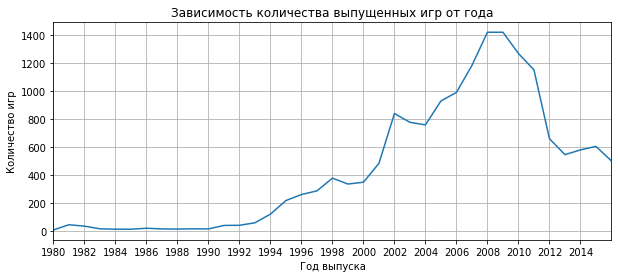

In [18]:
ax = (games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
           .plot(grid = True, figsize = (10, 4), xticks = range(1980, 2016, 2),
                 title = 'Зависимость количества выпущенных игр от года', legend = False))
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр');

До 1991 года количество ежегодно выпускаемых игр оставалось примерно на одном уровне, после чего начался рост, продлившийся до 2008 года (с небольшими снижениями в 1999 и 2003-2004 годах). Начиная с 2010 года, наблюдается резкий спад числа релизов, замедлившийся в 2012 году, после которого значения исследуемого показателя колеблются в районе 500-700 игр в год, что примерно соответствует уровню 2001 года. Таким образом, с учётом описанных изменений на рынке игр период времени с 2012 года представляется наиболее важным для исследования.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.

In [19]:
top_platform = (games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
                     .sort_values('total_sales', ascending = False)
                     .head(5))
display(top_platform)

,total_sales
platform,
ps2,1241.70
x360,965.85
ps3,935.12
wii,903.39
ds,803.51


Самой успешной платформой за всё время оказалсь *PS2*. Всего в топ-5 вошли разные версии платформ трёх брендов: *PlayStation*, *Xbox* и *Nintendo*. На основе полученного рейтинга построим распределение продаж по годам.

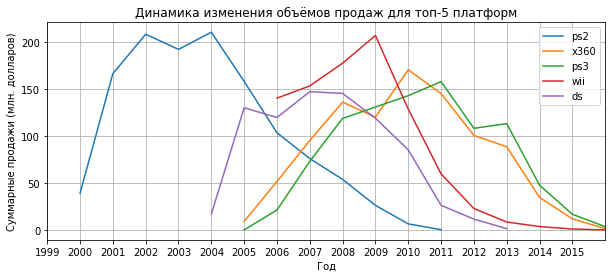

In [20]:
fig, ax = plt.subplots()
for i in top_platform.index:
    (games.query('platform == @i & year_of_release > 1990')
          .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
          .plot(ax = ax, grid = True, figsize = (10, 4), xticks = range(1999, 2016, 1)))

ax.set_title('Динамика изменения объёмов продаж для топ-5 платформ')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи (млн. долларов)')
ax.legend(top_platform.index)
plt.show()

По полученному графику видно, что платформы «живут» от 9 до 11 лет, однако находятся на высоком уровне продаж лишь 5-7 лет, после чего устаревают и вытесняются более современными моделями. Чтобы убедиться в этом, посмотрим, как часто топовые бренды выпускают новые версии своих платформ.

In [21]:
def generation(list):
    x = []
    for i in list:
        x.append(games.loc[games['platform'] == i, 'year_of_release'].min())
    print(x)

print('Nintendo:')
generation(['n64', 'gc', 'wii', 'wiiu'])
print()
print('PlayStation:')
generation(['ps', 'ps2', 'ps3', 'ps4'])
print()
print('Xbox:')
generation(['xb', 'x360', 'xone'])

Nintendo:
[1996, 2001, 2006, 2012]

PlayStation:
[1994, 2000, 2005, 2013]

Xbox:
[2000, 2005, 2013]


Новые версии платформ выходят каждые 5-7 лет. Таким образом, по полученным результатам можно сделать вывод, что наиболее актуальным периодом, данные которого помогут построить прогноз на 2017 год, является период времени с 2012 до 2016 года включительно.

Посмотрим, какие платформы лидируют по продажам за актуальный период времени. Для получения более полной картины выберем топ-10 самых успешных платформ.

In [22]:
new_games = games.query('year_of_release >= 2012')
top_new_platform = (new_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
                                 .sort_values('total_sales', ascending = False)
                                 .head(10))
top_new_platform

,total_sales
platform,
ps4,314.14
ps3,289.70
x360,237.52
3ds,195.01
xone,159.32
wiiu,82.19
pc,63.16
psv,49.18
wii,36.60


На основе полученного рейтинга построим распределение продаж по годам.

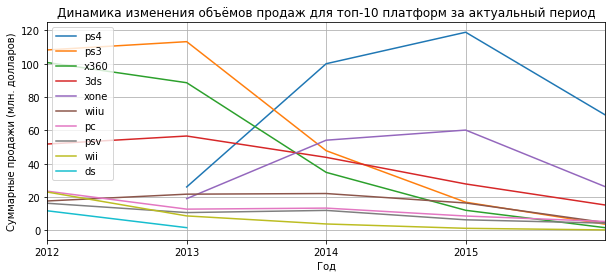

In [23]:
fig, ax = plt.subplots()
for i in top_new_platform.index:
    (new_games.query('platform == @i')
              .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
              .plot(ax = ax, grid = True, figsize = (10, 4), xticks = range(2012, 2016, 1)))

ax.set_title('Динамика изменения объёмов продаж для топ-10 платформ за актуальный период')
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи (млн. долларов)')
ax.legend(top_new_platform.index, loc = 'upper left')
plt.show()

По полученным рейтингу и графику видно, что наиболее успешными платформами за актуальный период времени по-прежнему являются продукты брендов *PlayStation*, *Xbox* и *Nintendo*, при этом продажи игр на всех платформах падают. Также можно отметить, что несмотря на высокие позиции в рейтинге, платформы *PS3* и *X360* являются устаревшими, о чем свидетельствует резкое падение продаж после 2013 года. Таким образом, среди всех платформ можно выделить 3 потенциально наиболее прибыльных: *PS4*, *XOne* и *3DS*.

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

,sum,count,median
,total_sales,total_sales,total_sales
platform,,,
ps4,314.14,392,0.20
ps3,289.70,493,0.20
x360,237.52,294,0.31
3ds,195.01,397,0.11
xone,159.32,247,0.22
wiiu,82.19,147,0.22
pc,63.16,254,0.08
psv,49.18,411,0.05


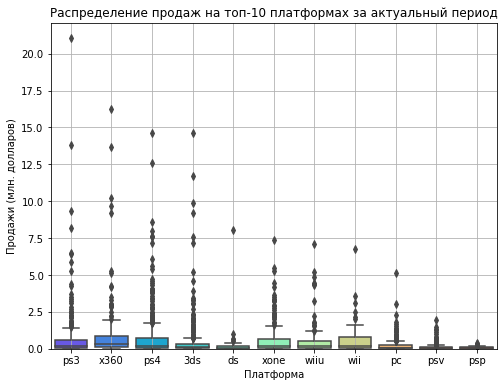

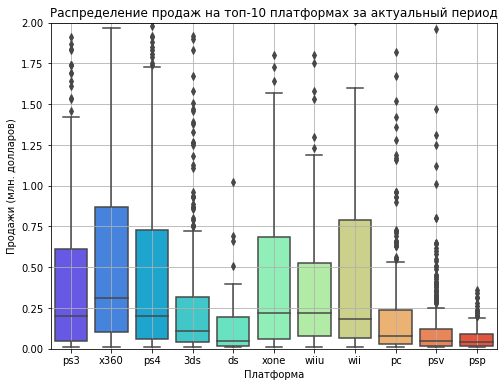

In [24]:
display(new_games.query('platform.isin(@top_new_platform.index)')
                 .pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['sum', 'count', 'median'])
                 .sort_values(('sum', 'total_sales'), ascending = False))

def boxplot(lim):
    fig, ax = plt.subplots()
    ax = sns.boxplot(x = 'platform', y = 'total_sales', data = new_games, palette='rainbow')
    ax.grid(True)
    ax.set_title('Распределение продаж на топ-10 платформах за актуальный период')
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Продажи (млн. долларов)')
    fig.set_size_inches(8, 6)
    ax.set_ylim(lim)
    plt.show()

boxplot(False)
boxplot((0, 2)) # ограничим лимит по оси y

По полученному графику видно, что продажи игр на разных платформах различаются. Наиболее продаваемые игры выпускались на платформах: *PS3*, *X360*, *PS4* и *3DS*. Однако 75 % продаж на *3DS* находятся на относительно низком уровне. Лидером по медианной продаже является *X360* (\\$0.31 млн.). Немного уступают по этому показателю: *PS3*, *PS4*, *XOne*, *WiiU* и *Wii* (от \\$0.18 до \\$0.22 млн.). Также все 6 перечисленных платформ с более высокими медианами заметно выделяются и по межквартильному размаху, который примерно в 2 и более раза шире, чем у остальных платформ. При этом наибольший межквартильный размах наблюдается у *X360* и *Wii*.

Можно также отметить тот факт, что несмотря на большой межквартильный размах, в полученном ранее рейтинге *Wii* занимает предпоследнее место. Подобные несоответсвия объясняются количеством выпущенных на платформе игр.

Посмотрим, как отзывы пользователей и критиков влияют на продажи. Для этого построим диаграммы рассеяния и посчитаем корреляцию между оценками и продажами на трёх потенциально прибыльных платформах, которые были выделены ранее.

In [25]:
# Для удобства отображения диаграмм рассеяния приведём оценки
# пользователей и критиков к одному масштабу
warn.filterwarnings('ignore')
new_games['critic_score'] = new_games['critic_score'] / 10
warn.filterwarnings('default')

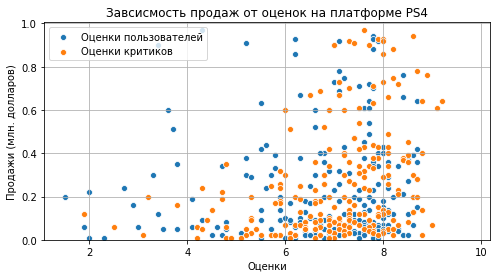

Коэффициент корреляции между продажами и оценками пользователей равен: -0.02
Коэффициент корреляции между продажами и оценками критиков равен: 0.39
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


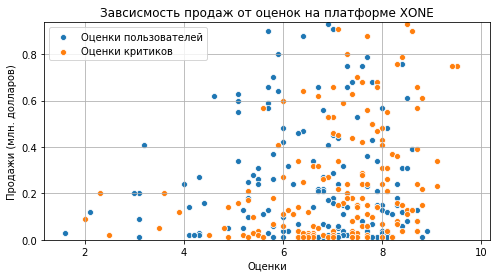

Коэффициент корреляции между продажами и оценками пользователей равен: -0.09
Коэффициент корреляции между продажами и оценками критиков равен: 0.38
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


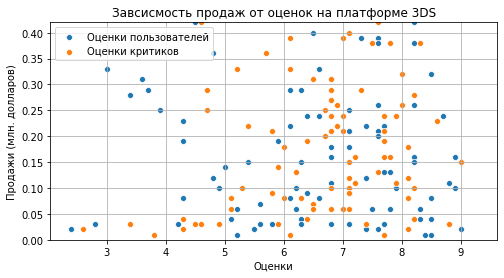

Коэффициент корреляции между продажами и оценками пользователей равен: 0.21
Коэффициент корреляции между продажами и оценками критиков равен: 0.29
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


In [26]:
def scatter(platform):
    query = new_games.query('platform == @platform')
    fig, ax = plt.subplots()
    sns.scatterplot(ax = ax, x = 'user_score', y = 'total_sales', data = query)
    sns.scatterplot(ax = ax, x = 'critic_score', y = 'total_sales', data = query)
    ax.grid(True)
    IQR = query['total_sales'].quantile(0.75) - query['total_sales'].quantile(0.25)
    ax.set_ylim(0, 1.5 * IQR)
    ax.set_title('Завсисмость продаж от оценок на платформе ' + platform.upper())
    ax.set_xlabel('Оценки')
    ax.set_ylabel('Продажи (млн. долларов)')
    ax.legend(['Оценки пользователей', 'Оценки критиков'], loc = 'upper left')
    fig.set_size_inches(8, 4)
    plt.show()
    print('Коэффициент корреляции между продажами и оценками пользователей равен:', 
          round(query['total_sales'].corr(query['user_score']), 2))
    print('Коэффициент корреляции между продажами и оценками критиков равен:', 
          round(query['total_sales'].corr(query['critic_score']), 2))
    print('—' * 120)
    
scatter('ps4')
scatter('xone')
scatter('3ds')

Результаты на платформах *XOne* и *PS4* оказались схожими: между продажами и оценками критиков присутствует средняя связь с коэффициентами корреляции 0.38 и 0.39, а между продажами и оценками пользователей — отсутствует. Коэффициенты корреляции, полученные для платформы *3DS*, говорят о примерно одинаковом уровне влияния отзывов на продажи (0.21 для пользовтаелей и 0.29 для критиков), однако эта связь выражена более слабо, чем между оценками критиков и продажами игр на двух предыдущих платформах.

Посмотрим на общее распределение игр по жанрам.

,sum,count,median
,total_sales,total_sales,total_sales
genre,,,
action,446.06,1040,0.120
shooter,304.75,237,0.430
role-playing,192.80,370,0.140
sports,181.06,267,0.240
misc,85.28,193,0.120
platform,61.00,85,0.210
racing,53.50,115,0.140
fighting,44.49,109,0.130


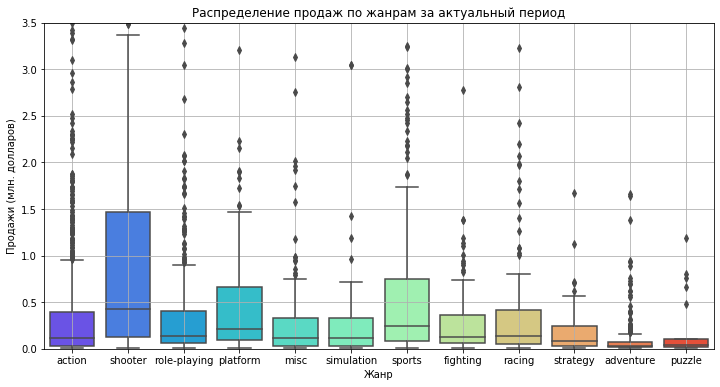

In [27]:
display(new_games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count', 'median'])
                 .sort_values(('sum', 'total_sales'), ascending = False))

fig, ax = plt.subplots()
ax = sns.boxplot(x = 'genre', y = 'total_sales', data = new_games,
            palette='rainbow'
           )
fig.set_size_inches(12, 6)
ax.grid(True)
ax.set_title('Распределение продаж по жанрам за актуальный период')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи (млн. долларов)');
ax.set_ylim(0, 3.5);

Самое большое количество игр выпускается в жанре *Action* (1040 штук за 5 лет рассматриваемого периода), который, как следствие, имеет и самые высокие суммарные продажи (\\$446 млн.), однако является средним по удельной прибыльности — медианное значение продаж составляет \\$0.12 млн. Наиболее сильно выделяются игры жанра *Shooter*, медианное значение продаж которых равно \\$0.43 млн., что значительно превышает аналогичные показатели для игр других жанров. Гораздо более широким является и межквартильный размах, что обеспечивает высокие суммарные продажи (\\$305 млн.) при среднем  уровне числа выпущенных игр (237 штук). Следующими по прибыльности можно выделить игры в жанрах *Platform* и *Sports*, которые также имеют относительно большие медианные значения продаж (\\$0.21 и \\$0.24 млн. соответственно) и межквартильные размахи. Наиболее низкими продажами и прибыльностью обладают игры в жанрах *Adventure*, *Puzzle* и *Strategy*.

#### Вывод
Проведён исследовательский анализ данных, в ходе которого установлено, что после роста количества ежегодно выпускаемых игр, продлившегося с 1991 по 2008 год, наметился резкий спад. Он замедлился только в 2012 году, после которого число релизов колеблется в районе 500-700 игр в год. Выяснено, что время «жизни» платформ составляет 9-11 лет, при этом уже через 5-7 лет после появления платформы устаревают и вытесняются новыми. Исходя из полученных результатов, выбран наиболее актуальный для исследования период — с 2012 до 2016 года.

Составлен рейтинг продаж игр на различных платформах за актуальный период. Установлено, что наиболее успешными платформами являются продукты брендов *PlayStation*, *Xbox* и *Nintendo*. Несмотря на падение продаж на всех платформах, выделены 3 потенциально наиболее прибыльные: *PS4*, *XOne* и *3DS*. Определено, что среди этих платформ *3DS* имеет наименьшее медианное значение продаж (\\$0.11 млн.) и межквартильный размах, а *PS4* и *XOne* — более высокие и более близкие друг к другу показатели (медианные значения продаж: \\$0.2 и \\$0.22 млн. соответственно).

Исследовано влияние отзывов на продажи игр на потенциально прибыльных платформах. Определено наличие средней связи между оценками критиков и продажами на платформах *PS4* и *XOne*, а также слабой связи оценок критиков и пользователей с продажами на платформе *3DS*.

Установлено, что наиболее прибыльными являются игры жанров: *Shooter* (медианное значение продаж: \\$0.43 млн.), *Platform* (\\$0.21 млн.), *Sports* (\\$0.24 млн.). Жанры с наибольшими суммарными продажами: *Action* (\\$446 млн.), *Shooter* (\\$305 млн.), *Role-playing* (\\$193 млн.) и *Sports* (\\$181 млн.).

### 4. Составление портрета пользователя каждого региона

Определим самые популярные платформы (топ-5) для пользователя каждого региона. Для этого создадим функцию *top_by_region*, которая на основе входных данных в виде названий столбцов с категорией (в данном случае платформы) и регионом будет строить круговую диаграмму с распределением долей платформ в топе, а также график с динамикой их изменения в течение актуального периода времени.

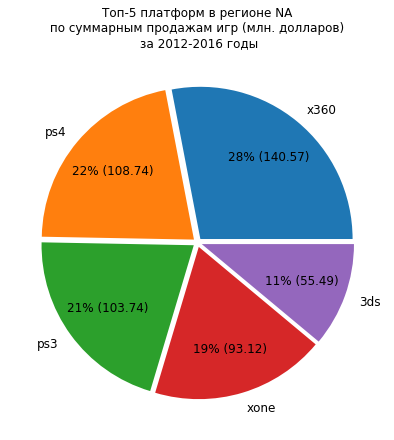

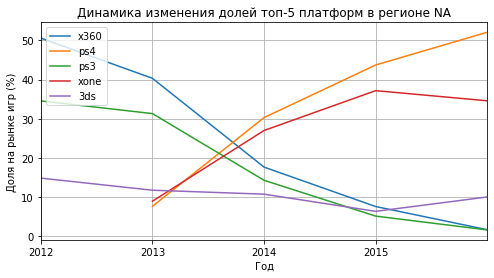

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


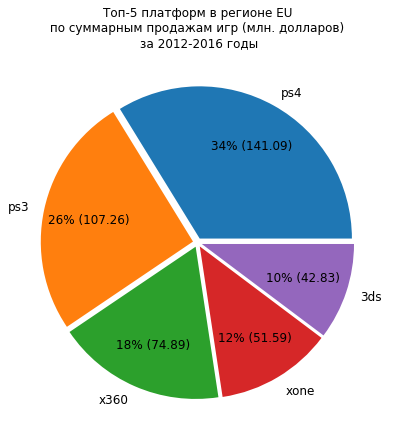

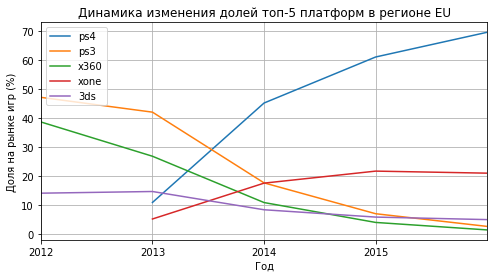

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


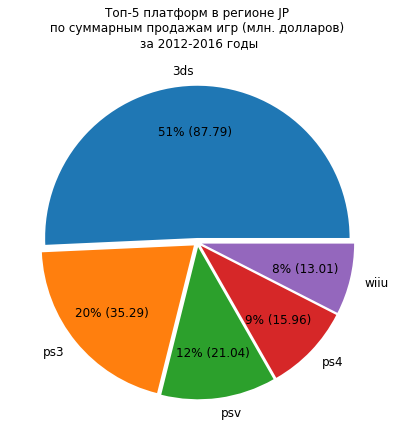

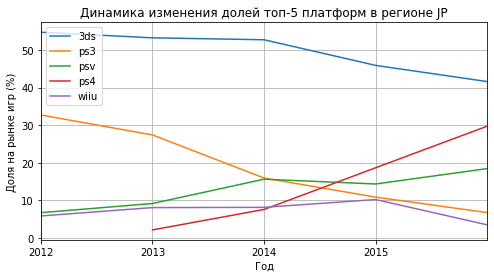

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


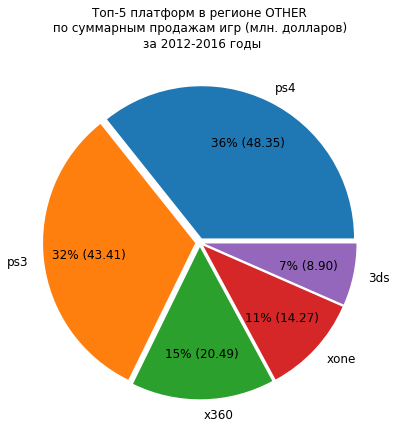

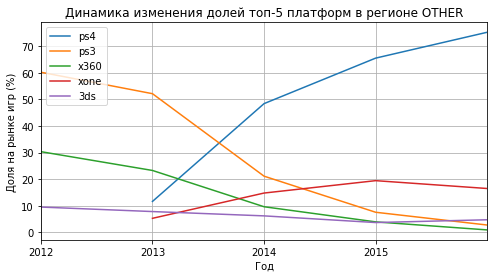

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


In [28]:
def top_by_region(index, values):
    # Составим топ
    top = (new_games.pivot_table(index = index, values = values, aggfunc = 'sum')
                    .sort_values(values, ascending = False)
                    .head(5))
    # Определим вспомогательные переменные для задания подписей к графикам
    if index == 'platform':
        index_rus = 'платформ'
    if index == 'genre':
        index_rus = 'жанров'
    region = values.partition('_sales')[0].upper()
    # Построим круговую диаграмму
    fig, ax = plt.subplots()
    top.plot.pie(ax = ax, y = values, 
                 figsize = (7, 7), explode = [0.03] * 5, legend = False, 
                 fontsize = 12, pctdistance = 0.7,
                 autopct = lambda p: '{:.0f}% ({:.2f})'.format(p, p * top[values].sum() / 100))
    ax.set_ylabel('')
    ax.set_title('Топ-5 ' + index_rus + ' в регионе ' + region + 
                 '\n по суммарным продажам игр (млн. долларов) \n за 2012-2016 годы')
    plt.show()
    # Сформируем таблицу с динамикой изменения популярности
    dynamics = (new_games[new_games[index].isin(top.index)]
                .pivot_table(index = index, columns = 'year_of_release', values = values, aggfunc = 'sum'))
    for i in dynamics.columns:
        sum_sales = dynamics[i].sum()
        dynamics[i] = dynamics[i] * 100 / sum_sales # перевод продаж в доли
    dynamics = dynamics.transpose()
    # Построим график динамики изменения популярности
    fig, ax = plt.subplots()
    for i in top.index:
        dynamics[i].plot(ax = ax, grid = True, figsize = (8, 4), xticks = range(2012, 2016, 1))
    ax.set_xlabel('Год')
    ax.set_ylabel('Доля на рынке игр (%)')
    ax.legend(top.index, loc = 'upper left')
    ax.set_title('Динамика изменения долей топ-5 ' + index_rus + ' в регионе ' + region)    
    plt.show()
    print('—' * 120)

top_by_region('platform', 'na_sales')
top_by_region('platform', 'eu_sales')
top_by_region('platform', 'jp_sales')
top_by_region('platform', 'other_sales')

Во всех регионах кроме Японии топ-5 содержит одни и те же платформы: *3DS*, *PS3*, *PS4*, *X360* и *XOne*. Причём *3DS* неизменно находится на пятом месте, занимая 7-11 % рынка игр (в среднем за актуальный период). Наибольшие региональные отличия заключаются в выборе пользователей между продуктами брендов *Xbox* и *PlayStation*. Для Северной Америки характерна более высокая степень конкуренции между этими компаниями. В случае с прошлым поколением консолей пользователи покупали больше игр на *X360*, чем на *PS3* (в 2012 году около 50 и 35 % рынка игр среди топ-5 платформ соответственно), однако после выхода нового поколения их выбор склонился в пользу *PlayStation*: в 2016 году *PS4* занимает более 50 %, а *X360* — около 35 %. В Европе же ситуация сложилась иначе: платформы *PlayStation* в течение всего рассматриваемого периода времени были популярнее, чем *Xbox*. Наибольших успехов достигла *PS4*, занявшая в 2016 году 70 % рынка игр среди топ-5 платформ и имеющая долю 34 % за весь период в среднем. Распределение популярности платформ в категории «другие регионы» в целом похоже на европейское, но можно отметить, что выбор в пользу *PlayStation* выражен ещё более сильно.

Совершенно другая структура рынка наблюдается в Японии, где пользователи в гораздо большей степени предпочитают портативные консоли (*3DS* и *PSV*), а также японские бренды в целом (весь топ занимают японские *PlayStation* и *Nintendo*, а американская *Xbox* отсутствует). Наиболее популярной платформой является *3DS*, занимая 51 % рынка игр (в среднем за актуальный период). Однако за последние 2 года её доля на рынке снизилась до чуть более 40 %, а доля *PS4* и *PSV* возросла до 30 и 20 % соответственно.

Аналогичным образом, используя функцию *top_by_region*, определим самые популярные жанры (топ-5) для пользователя каждого региона. 

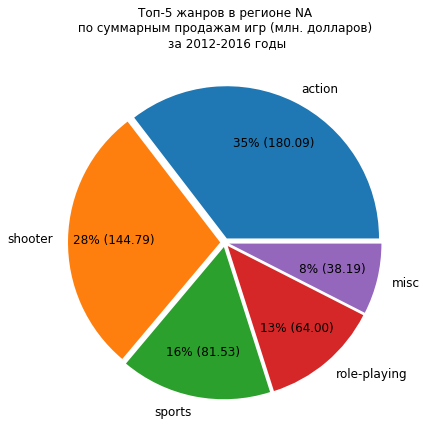

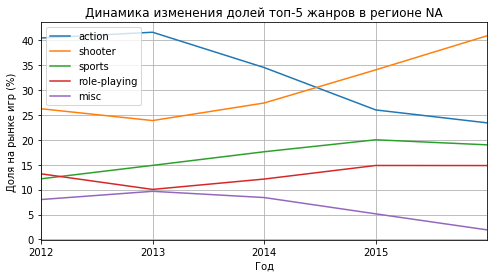

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


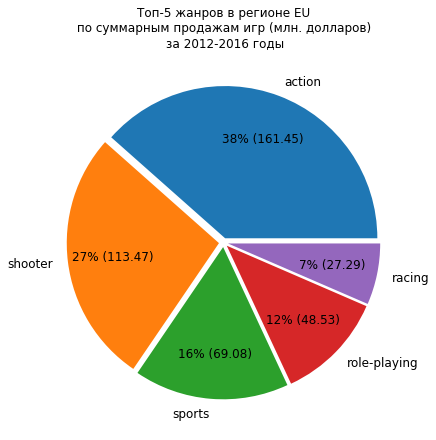

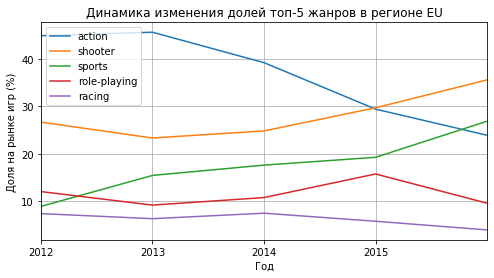

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


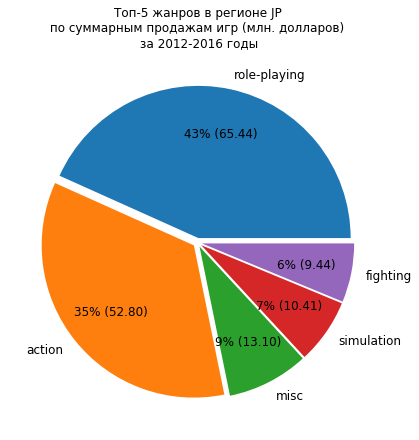

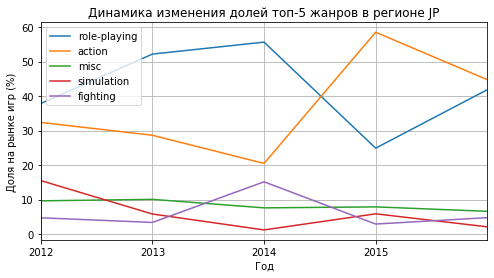

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


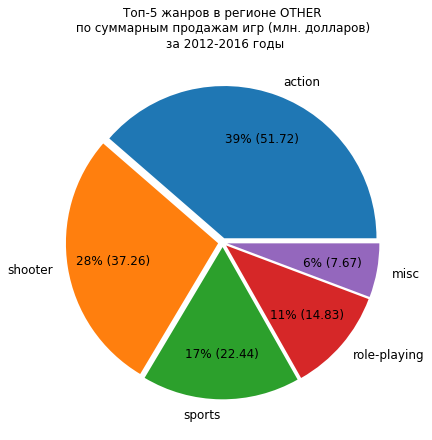

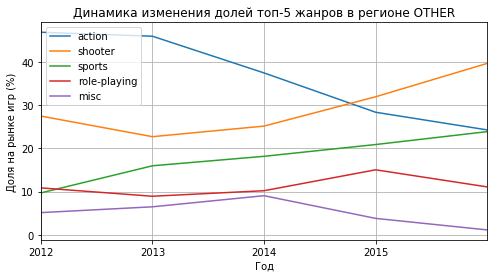

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————


In [29]:
top_by_region('genre', 'na_sales')
top_by_region('genre', 'eu_sales')
top_by_region('genre', 'jp_sales')
top_by_region('genre', 'other_sales')

Во всех регионах кроме Японии топ-4 жанров (за весь период в среднем) выглядит одинаково, имея лишь небольшие различия в размерах долей:
* *Action* (35-39 %);
* *Shooter* (27-28 %);
* *Sports* (16-17 %);
* *Role-playing* (11-13 %).

5-е место в Европе занимает *Racing* (7 %), а в Северной Америке и других регионах — *Misc* (6-8 %). При этом во всех перечисленных регионах наблюдается рост популярности игр жанра *Shooter*, который в 2016 году находится на первом месте (35-40 %), а попуярность *Action*-игр снижается.

Другая картина наблюдается в Японии, где выделяются 2 наиболее популярных жанра, доли которых в течение актуального периода изменяются довольно резко и почти зеркально: *Role-playing* (43 %) и *Action* (35 %). Менее популярны жанры: *Misc* (9 %), *Simulation* (7 %) и *Fighting* (6 %).

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
e,26.0,33.0,23.0,23.0
e10+,14.0,10.0,16.0,13.0
m,47.0,25.0,48.0,49.0
t,13.0,33.0,14.0,14.0


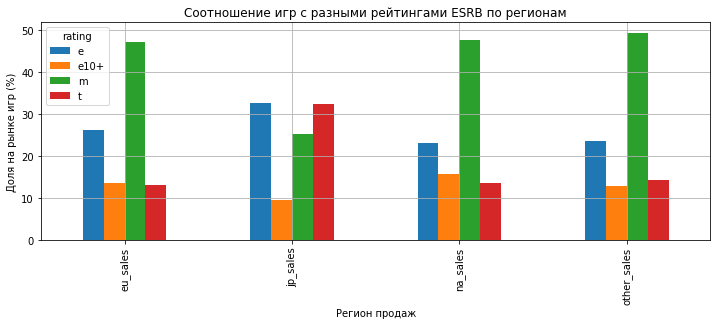

In [30]:
rating_by_region = new_games.pivot_table(index = 'rating', 
                                         values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                         aggfunc = 'sum')
for i in rating_by_region.columns:
    region_sales = rating_by_region[i].sum()
    rating_by_region[i] = rating_by_region[i] * 100 / region_sales
display(round(rating_by_region))
fig, ax = plt.subplots()
rating_by_region.transpose().plot.bar(ax = ax, grid = True, figsize = (12, 4));
ax.set_xlabel('Регион продаж')
ax.set_ylabel('Доля на рынке игр (%)')
ax.set_title('Соотношение игр с разными рейтингами ESRB по регионам');

Во всех регионах кроме Японии сооношение игр с разными рейтингами *ESRB* выглядит следующим образом:
* *M* (17+) — 46-49 % продаж;
* *E* (6+) — 23-26 % продаж;
* *E10+* (10+) и *T* (13+) — 13-16 % и 14-15 % продаж соответственно.

Иная ситуация, как и в предыдущих случаях, сложилась в Японии, где наиболее популярны игры с рейтингами *E* и *T*, составляющие по 33 % продаж. Чуть менее популярны игры с рейтингом *M* — 25 % продаж. Наименее популярными оказались игры с рейтингом *E10+* — 10 % продаж.

#### Вывод
Составлены портреты пользователей каждого региона.

Северная Америка:
* выбирают между консолями *PlayStation* (в сумме ~ 43 % продаж за актуальный период) и *Xbox* (в сумме ~ 47 % за актуальный период), отдавая предпочтение *PS* в течение последних трёх лет (в 2016 году ~ 50 % у *PS4* и ~ 35 % у *XOne*); реже предпочитают *3DS* (~ 11% за актуальный период);
* предпочитают жанры *Action* (~ 35 % продаж за актуальный период) и *Shooter* (~ 28 %), реже — *Sports* (~ 16 %) и *Role-playing* (~ 13 %), ещё реже — *Misc* (~ 8 %); наблюдается тенденция к росту популярности жанра *Shooter* (~ 40 % в 2016 году);
* предпочитают игры с рейтингом *M* (~ 47 %), реже — *E* (~ 23 %), ещё реже — *E10+* (~ 16 %) и *T* (~ 14 %).

Европа:
* предпочитают консоли *PlayStation* (в сумме ~ 60 % продаж за актуальный период; ~ 70 % у *PS4* в 2016 году), реже — *Xbox* (в сумме ~ 30 % за актуальный период; ~ 20 % у *XOne* в 2016 году), ещё реже — *3DS* (~ 10 % за актуальный период);
* предпочитают жанры *Action* (~ 38 % продаж за актуальный период) и *Shooter* (~ 27 %), реже — *Sports* (~ 16 %) и *Role-playing* (~ 12 %), ещё реже — *Racing* (~ 7 %); наблюдается тенденция к росту популярности жанров *Shooter* (~ 35 % в 2016 году) и *Sports* (~ 25 % в 2016 году);
* предпочитают игры с рейтингом *M* (~ 46 %), реже — *E* (~ 26 %), ещё реже — *E10+* (~ 14 %) и *T* (~ 14 %).


Япония:
* в большей степени предпочитают портативные консоли и платформы японских брендов (*Nintendo* и *PlayStation*); чаще всего выбирают *3DS* (~ 51 % продаж за актуальный период), реже — *PlayStation* (за актуальный период ~ 20 % у *PS3*, ~ 12 % у *PSV*, ~ 9 % у *PS4*), ещё реже — *WiiU* (~ 8 % за актуальный период); при этом в 2016 наблюдается снижение доли *3DS* (~ 40 %) и увеличение *PS4* (~ 30 %) и *PSV* (~ 20 %);
* предпочитают жанры *Role-playing* (~ 43 % продаж за актуальный период) и *Action* (~ 35 %), реже — *Misc* (~ 9 %), *Simulation* (~ 7 %) и *Fighting* (~ 6 %);
* предпочитают игры с рейтингом *E* (~ 33 %) и *T* (~ 33 %), реже — *M* (~ 25 %), ещё реже — *E10+* (~ 10 %).


Другие регионы:
* предпочитают консоли *PlayStation* (в сумме ~ 68 % продаж за актуальный период; ~ 75 % продаж у *PS4* в 2016 году), реже — *Xbox* (в сумме ~ 26 % продаж за актуальный период; ~ 15 % продаж у *XOne* в 2016 году), ещё реже — *3DS* (~ 7 % продаж за актуальный период);
* предпочитают жанры *Action* (~ 39 % продаж за актуальный период) и *Shooter* (~ 28 %), реже — *Sports* (~ 17 %) и *Role-playing* (~ 11 %), ещё реже — *Misc* (~ 6 %); наблюдается тенденция к росту популярности жанра *Shooter* (~ 40 % в 2016 году);
* предпочитают игры с рейтингом *M* (~ 49 %), реже — *E* (~ 23 %), ещё реже — *E10+* (~ 13 %) и *T* (~ 15 %).

### 5. Проверка гипотез

Проверим различаются ли средние пользовательские рейтинги платформ *Xbox One* и *PC*. Hулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, поэтому сформулируем H₀ как: «средние пользовательские рейтинги платформ *Xbox One* и *PC* не различаются». Исходя из H₀ формулируется альтернативная гипотеза H₁: «средние пользовательские рейтинги платформ *Xbox One* и *PC* различаются». Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод *ttest_ind* библиотеки *scipy*. Зададим критический уровень статистической значимости, равный 5 %, а также передадим параметру *equal_var* значение *False*, поскольку неизвестно были ли выборки взяты из схожих совокупностей. Рассчитаем дисперсии, стандартные отклонения и средние значения обеих выборок.

In [59]:
# Так как дисперсия и стандартное отклонение рассчитываются по выборке,
# то для возможности указания параметра ddof при расчёте значений в 
# сводной таблице создадим вспомогательные функции 
def npvar(x):
    return np.var(x, ddof = 1)
def npstd(x):
    return np.std(x, ddof = 1)  
# Рассчитаем статистичексие параметры
display(round(new_games.query('(platform == "xone" | platform == "pc") & user_score.notnull()')
                       .pivot_table(index = 'platform', values = 'user_score', aggfunc = ['mean', npvar, npstd]), 2))
# Проверим гипотезы
alpha = .05
results = st.ttest_ind(new_games.query('platform == "xone" & user_score.notnull()')['user_score'], 
                       new_games.query('platform == "pc" & user_score.notnull()')['user_score'],
                       equal_var = False)

print('p-value =', results.pvalue)
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

,mean,npvar,npstd
,user_score,user_score,user_score
platform,,,
pc,6.45,2.77,1.66
xone,6.61,1.90,1.38


p-value = 0.27942867493612644

Не получилось отвергнуть нулевую гипотезу


Средняя оценка пользователей на платформе *Xbox One* оказалась равна 6.61, что немного больше, чем аналогичный показатель на *PC* — 6.45. Дисперсии и стандартные отклонения двух платформ также несколько отличаются: 1.9 / 2.77 и 1.38 / 1.66 на *Xbox One* / *PC* соответственно. Однако величина этого отличия несущественна, что говорит о схожей ширине распределения исследуемого параметра. Полученное по данным выборкам значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ *Xbox One* и *PC* неодинаковы, с вероятностью примерно 28 % такое или большее различие можно получить случайно. Таким образом, эта вероятность слишком высока, чтобы делать вывод о значимом различии между пользовательскими оценками платформ *Xbox One* и *PC*.

Аналогичным образом проверим отличаются ли средние пользовательские рейтинги жанров *Action* и *Sports*. Сформулируем нулевую гипотезу H₀: «средние пользовательские рейтинги жанров *Action* и *Sports* не различаются». Исходя из H₀ формулируется альтернативная гипотеза H₁: «средние пользовательские рейтинги жанров *Action* и *Sports* различаются».

In [61]:
# Рассчитаем статистичексие параметры
display(round(new_games.query('(genre == "action" | genre == "sports") & user_score.notnull()')
                       .pivot_table(index = 'genre', values = 'user_score', aggfunc = ['mean', npvar, npstd]), 2))
# Проверим гипотезы
alpha = .05
results = st.ttest_ind(new_games.query('genre == "action" & user_score.notnull()')['user_score'], 
                       new_games.query('genre == "sports" & user_score.notnull()')['user_score'],
                       equal_var = False)

print('p-value =', results.pvalue)
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

,mean,npvar,npstd
,user_score,user_score,user_score
genre,,,
action,6.86,1.89,1.37
sports,5.42,2.88,1.70


p-value = 1.8355940297881128e-25

Отвергаем нулевую гипотезу


Дисперсии и стандартные отклонения для двух жанров, как и в предыдущем случае, оказались неодинаковыми, но относительно близкими (1.89 / 2.88 и 1.37 / 1.7 для жанров *Action* / *Sports* соответственно), что тоже говорит о схожей ширине распределения. При этом средние значения (6.86 для *Action* и 5.42 для *Sports*) отличаются более существенно — величина этого отличия сопоставима с величиной стандартного отклонения. Кроме того, полученное по данным выборкам значение p-value говорит о том, что разница между средними пользовательскими оценками для двух жанров настолько велика, что вероятность получить такое или большее различие случайно практически равна 0. Отсюда можно сделать вывод о значимом различии между средними пользовательскими рейтингами жанров *Action* и *Sports*.

#### Вывод

С помощью t-теста Стьюдента проверены гипотезы о различии средних пользовательских рейтингов платформ *Xbox One* и *PC*, а также жанров *Action* и *Sports*.

Средняя пользовательская оценка на платформе *Xbox One* составила 6.61, а на *PC* — 6.45. При этом значение p-value оказалось равным 0.28, что говорит о высокой вероятности отсутствия значимого различия между средними пользовательскими рейтингами платформ *Xbox One* и *PC*.

Средняя пользовательская оценка жанра *Action* составила 6.86, а жанра *Sports* — 5.42. При этом значение p-value оказалось практически равным нулю, что говорит о значимом различии между средними пользовательскими рейтингами жанров *Action* и *Sports*.

### 6. Общий вывод

В ходе выполнения проекта была произведена предобработка данных: изменён регистр строковых значений и названий столбцов; исправлены названия игр, устаревшие обозначения рейтинга *ESRB* и значения, фактически означавшие пропуски; обработаны дубликаты; изменены типы данных; заполнена часть пропущенных значений; удалена часть строк с пропусками, которые не удалось заполнить; рассчитаны суммарные продажи во всех регионах для каждой игры.

Проведён исследовательский анализ данных, в ходе которого установлено, что в разные отрезки времени число выпускаемых игр сильно менялось как в сторону увеличения, так и снижения, но зафиксировалось на уровне 500-700 игр в год, начиная с 2012 года. Определено, что новые платформы находятся на пике популярности в течение 5-7 лет, после чего устаревают и вытесняются новыми. На основании этого выбран наиболее актуальный для исследования период — с 2012 до 2016 года. Выделены 3 потенциально наиболее прибыльные платформы: *PS4*, *XOne* и *3DS*. Определено, что игры на *3DS* в среднем имеют более низкие продажи (медиана: \\$0.11 млн.), чем на *PS4* и *XOne* (медианы: \\$0.2 и \\$0.22 млн. соответственно). Выяснено, что для игр на *3DS* присутствует слабая связь оценок пользователей и критиков с продажами, а для игр на *PS4* и *XOne* характерна средняя степень влияния отзывов критиков на продажи. Установлено, что игры жанра *Shooter* имеют самые высокие средние показатели продаж (медиана: \\$0.43 млн.), а игры жанров *Action*, *Shooter*, *Role-playing* и *Sports* — наибольшие суммарные продажи (\\$446 млн., \\$305 млн., \\$193 млн., \\$181 млн. соответственно).

Составлены портреты пользователей каждого региона, согласно которым:
* в Северной Америке обычно выбирают платформу между продуктами брендов *PlayStation* (43 %) и *Xbox* (47 %), отдавая предпочтение *PS4* в течение последних трёх лет; чаще всего играют в игры жанров *Action* (35 %) и *Shooter* (28 %) с тенденцией к росту интереса к последним; предпочитают возрастной рейтинг *M* (47 %);
* в Японии в большинстве случаев выбирают платформы японских производителей, а также портативные консоли, чаще всего *3DS* (51 %); играют в игры жанров *Role-playing* (43 %) и *Action* (35 %); предпочитают возрастные рейтинги *E* и *T* (по 33 %); 
* в Европе и других регионах чаще всего выбирают консоли *PlayStation* (Европа: 60 % / другие регионы: 68 %); играют в игры жанров *Action* (38 % / 39 %) и *Shooter* (27 % / 28 %) с тенденцией к росту интереса к последним; предпочитают возрастной рейтинг *M* (46 % / 49 %);

По имеющейся выборке данных проведена проверка гипотез о различии средних пользовательских рейтингов платформ *Xbox One* и *PC*, а также жанров *Action* и *Sports*. Выяснилось, что средняя пользовательская оценка на платформе *Xbox One* равна 6.61, на *PC* — 6.45, а p-значение — 0.28, что с высокой долей вероятности позволяет сделать вывод об отсутствии различия между средними пользовательскими рейтингами платформ *Xbox One* и *PC* для двух генеральных совокупностей. Также удалось установить, что пользовательская оценка жанра *Action* равна 6.86, а жанра *Sports* — 5.42, при этом p-значение практически равно нулю, что позволило отвергнуть гипотезу о равенстве cредних пользовательских рейтингов жанров *Action* и *Sports* для двух генеральных совокупностей.

Таким образом, при закупке игр и планировании рекламных кампаний на японском рынке интернет-магазину «Стримчик» следует обратить наибольшее внимание на игры жанров *Role-playing* и *Action* с возрастными рейтингами *E* и *T*, которые выпускаются на платформе *Nintendo 3DS*. Для других регионов стоит сконцентрироваться на играх жанров *Action* и *Shooter* с возрастным рейтингом *M*, которые выпускаются на платформе *PlayStation 4*. Помимо этого, при работе на североамериканском рынке следует также рассматривать игры, выпускаемые на платформе *Xbox One*.